# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [46]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [47]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [55]:
# Your code here - Manipulate column names
col_subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
       
def format_col_names(col):
    for orig, new in col_subs:
        col = col.replace(orig,new)
    return col


In [56]:
df.columns = [format_col_names(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [57]:
# Your code here - Define the target and predictors
target = 'list_price'
pred = list(df.columns)
pred.remove('list_price')

In [58]:
# Your code here - Split into train and test
train, test = train_test_split(df)
train.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
1503,-0.525664,12.1878,-0.398512,1.087407,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5785,0.048199,73.1390,0.355539,0.390333,0.368848,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10355,0.778460,165.2971,-0.258873,-0.655279,0.783383,0.761617,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
9497,-0.241740,24.8429,-0.230945,0.738870,0.783383,1.083511,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9338,-0.062483,73.1878,-0.147162,-0.306741,-0.045687,0.278777,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
9690,-0.328361,42.5929,0.467250,0.041796,0.161581,0.439724,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6954,-0.459495,12.1878,-0.370585,-2.920769,-1.082024,-1.974478,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9009,-0.335579,24.3878,-0.426440,1.087407,-1.082024,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6060,-0.369265,32.9278,-0.203018,-0.829547,-0.667489,-0.525957,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3103,-0.294675,50.8980,-0.314729,0.738870,-0.667489,-1.008797,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
# Your code here - Fit the actual model
f = target+'~'+ '+'.join(pred)
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     565.5
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:36:09   Log-Likelihood:                -40650.
No. Observations:                8152   AIC:                         8.149e+04
Df Residuals:                    8057   BIC:                         8.216e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.3139      1.990     32.320      0.000      60.413      68.215
piece_count                                         75.0613      0.901     83.300      0.000      73.295      76.828
num_reviews                                          6.8903      0.695      9.917      0.000       5.528       8.252
play_star_rating                                     4.9847      0.632      7.886      0.000       3.746       6.224
star_rating                                         -1.3266      0.714     -1.857      0.063      -2.727       0.074
val_star_rating                                     -8.6361      0.637    -13.559      0.000      -9.885      -7.388
ages_10plus                                        126.5201      6.762     18.710      0.000     113.265     139.775
ages_10_14                                         -26.9009      9.378     -2.869      0.004     -45.283      -8.518
ages_10_16                                         -10.6871      4.192     -2.550      0.011     -18.904      -2.470
ages_10_21                                          51.2378      7.581      6.759      0.000      36.378      66.098
ages_11_16                                         -20.0063      5.848     -3.421      0.001     -31.469      -8.543
ages_12plus                                         72.9256      5.653     12.899      0.000      61.843      84.008
ages_12_16                                         -52.5509      6.846     -7.676      0.000     -65.971     -39.130
ages_14plus                                         24.2339      4.278      5.665      0.000      15.848      32.620
ages_16plus                                         39.3209      6.166      6.377      0.000      27.235      51.407
ages_1half_3                                        -8.9787      2.446     -3.671      0.000     -13.773      -4.185
ages_1half_5                                        -4.2415      3.174     -1.336      0.182     -10.464       1.981
ages_2_5                                            14.7180      1.736      8.479      0.000      11.315      18.121
ages_4plus                                         -20.1350      6.257     -3.218      0.001     -32.400      -7.870
ages_4_7                                            -5.8748      3.584     -1.639      0.101     -12.901       1.152
ages_4_99                                           -1.7958      3.595     -0.500      0.617      -8.842       5.250
ages_5plus                                          -9.5670      3.256     -2.939      0.003     -15.949      -3.185
ages_5_12                                          -34.1000      3.290    -10.364      0.000     -40.550     -27.650
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [67]:
# Your code here - Remove features which do not appear to be statistically relevant
pred = pred[:5]
pred

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating']

In [69]:
# Your code here - Refit the model
f = target+'~'+ '+'.join(pred)
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     5453.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:42:45   Log-Likelihood:                -42925.
No. Observations:                8152   AIC:                         8.586e+04
Df Residuals:                    8146   BIC:                         8.590e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           67.2956      0.519    129.659      0.000      66.278      68.313
piece_count         86.0398      0.611    140.924      0.000      84.843      87.237
num_reviews         -3.8027      0.624     -6.098      0.000      -5.025      -2.580
play_star_rating     7.7254      0.661     11.691      0.000       6.430       9.021
star_rating         -1.3061      0.834     -1.565      0.118      -2.942       0.330
val_star_rating    -13.6644      0.754    -18.126      0.000     -15.142     -12.187
==============================================================================
Omnibus:                     8628.297   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           967076.891
Skew:                           5.158   Prob(JB):                         0.00
Kurtosis:                      55.352   Cond. No.                         3.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Continue to refine the model

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

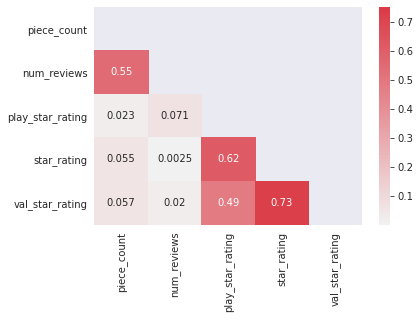

In [78]:
# Your code here - Code a way to identify multicollinearity
def check_multicol(df):
    corr = df.corr().abs()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0, annot=True)

X = df[pred]
check_multicol(X)

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
# Your code here - Subset features based on multicollinearity

In [ ]:
# Your code here - Refit model with subset features

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [ ]:
# Your code here - Check that the residuals are normally distributed

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Your code here - Check that the residuals are homoscedastic

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
# Your code here - Check for outliers

In [ ]:
# Your code here
# Remove extreme outliers


# Rerun the model

In [ ]:
# Your code here - Check normality assumption

In [ ]:
# Your code here - Check the Homoscedasticity Assumption

In [ ]:
# Your code goes here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 